### Viewing data, organizing data, importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

# Read in Data
data = pd.read_csv("all_data.csv")
#renaming column life expectancy at birth to life expect, making all columns lower case
data = data.rename(columns={'Life expectancy at birth (years)': 'life_exp', 'Country': 'country', 'Year': 'year', 'GDP': 'gdp'})
#renaming United states as USA
data['country'] = data['country'].str.replace('United States of America', 'USA')

print(data.head())

  country  year  life_exp           gdp
0   Chile  2000      77.3  7.786093e+10
1   Chile  2001      77.3  7.097992e+10
2   Chile  2002      77.8  6.973681e+10
3   Chile  2003      77.9  7.564346e+10
4   Chile  2004      78.0  9.921039e+10


### Checking data info

In [3]:
#Checking data formats, looking for nan values, length of data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   96 non-null     object 
 1   year      96 non-null     int64  
 2   life_exp  96 non-null     float64
 3   gdp       96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


### Basic Statistical Data

In [4]:
print(data.describe())

              year   life_exp           gdp
count    96.000000  96.000000  9.600000e+01
mean   2007.500000  72.789583  3.880499e+12
std       4.633971  10.672882  5.197561e+12
min    2000.000000  44.300000  4.415703e+09
25%    2003.750000  74.475000  1.733018e+11
50%    2007.500000  76.750000  1.280220e+12
75%    2011.250000  78.900000  4.067510e+12
max    2015.000000  81.000000  1.810000e+13


### Unique values in 'country' column

In [5]:
print(data['country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


### Unique values in 'year' column

In [6]:
print(data['year'].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


### Questions

- Has life expectancy increased over time in the six nations?

- Has GDP increased over time in the six nations?

- Is there a correlation between GDP and life expectancy of a country?

- What is the average life expectancy in these nations?
   
- What is the distribution of that life expectancy?
    


### Country and life expectancy Boxplot

### Country and GPD Boxplot

/tmp/ipykernel_1883/3915467324.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='country', y='life_exp', data=data, palette='Accent')
/tmp/ipykernel_1883/3915467324.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


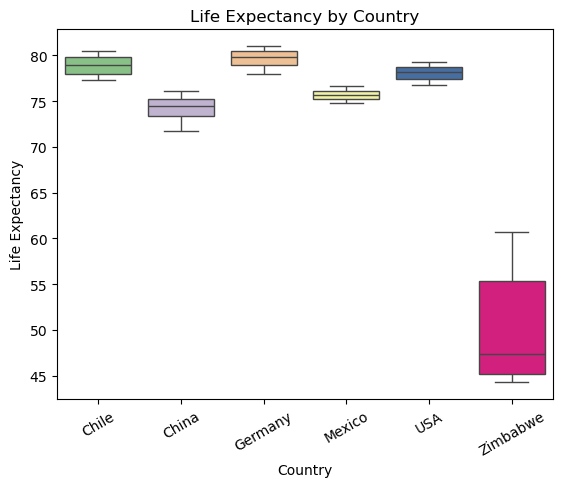

<Figure size 640x480 with 0 Axes>

In [7]:
ax = sns.boxplot(x='country', y='life_exp', data=data, palette='Accent')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title('Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.show()
plt.clf()



### Life Expectancy by Year Scatter Plot

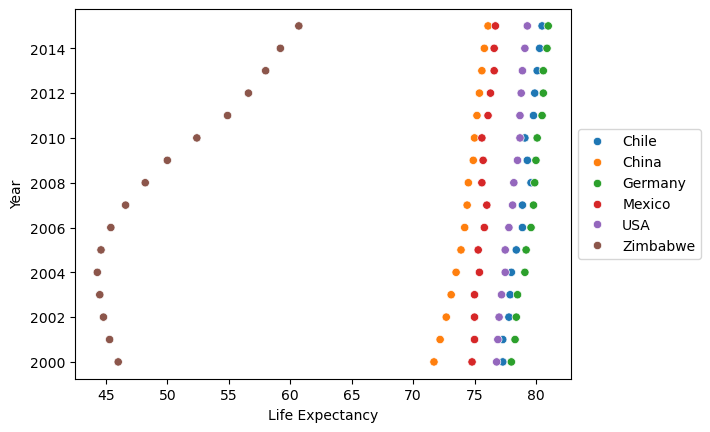

<Figure size 640x480 with 0 Axes>

In [8]:
sns.scatterplot(x=data.life_exp, y=data.year, hue=data.country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Life Expectancy')
plt.ylabel('Year')
plt.show()
plt.clf()

### Life Expectancy by Year Lineplot

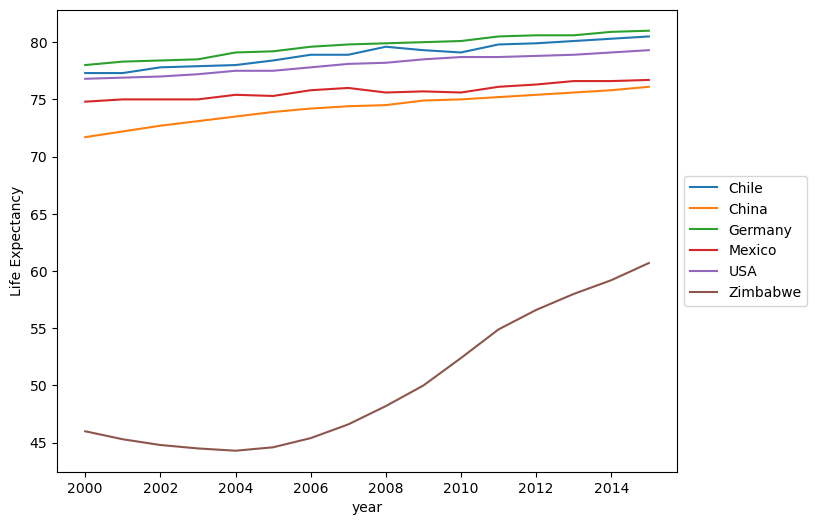

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data.year, y=data.life_exp, hue=data.country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life Expectancy")
plt.show()
plt.clf()

/tmp/ipykernel_1883/2559129209.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='country', y='gdp', data=data, palette='Accent')
/tmp/ipykernel_1883/2559129209.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


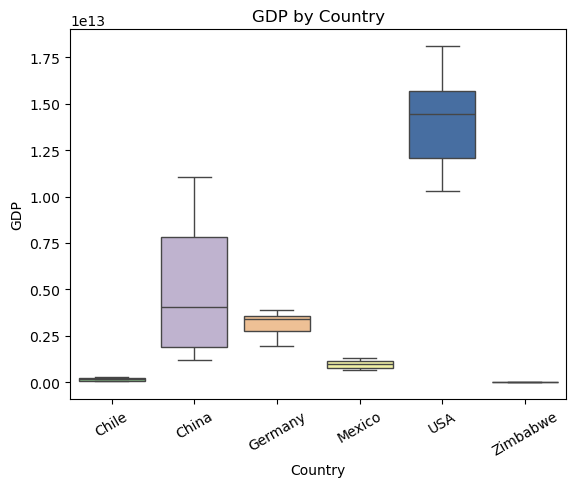

<Figure size 640x480 with 0 Axes>

In [19]:
ax = sns.boxplot(x='country', y='gdp', data=data, palette='Accent')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title('GDP by Country')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.show()
plt.clf()

### Country and GPD Barplot

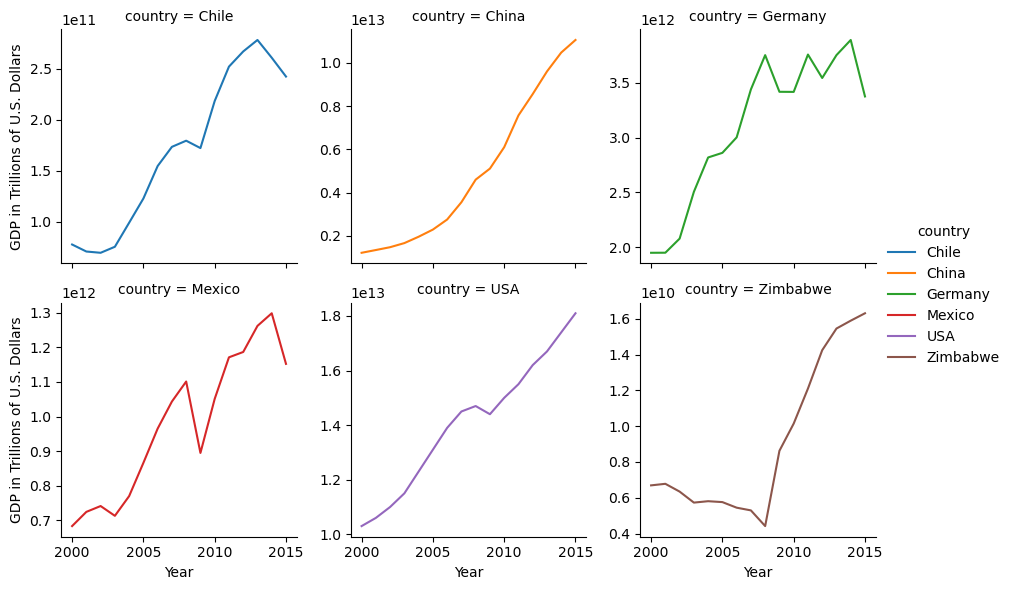

In [10]:
graphGDP = sns.FacetGrid(data, col="country", col_wrap=3,
                      hue = "country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"year","gdp")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

### Lineplot of Year and GDP

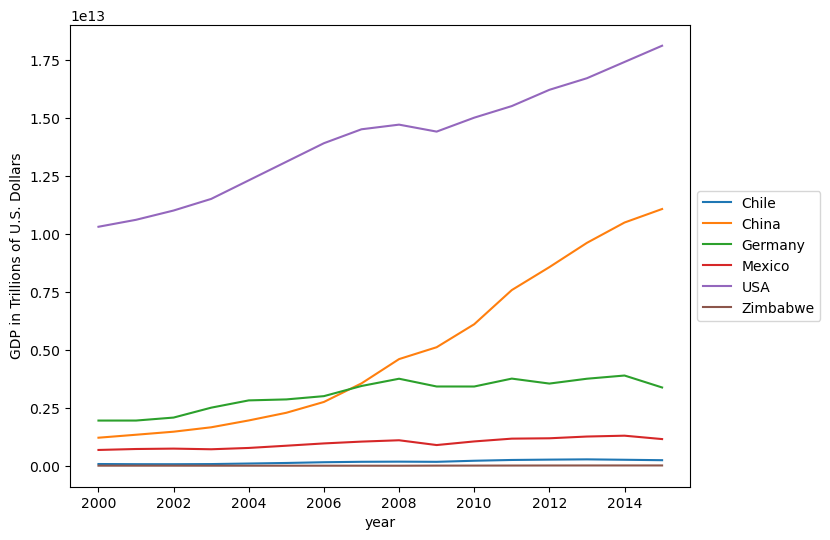

In [11]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data.year, y=data.gdp, hue=data.country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

### Dataframe with means of life expectancy and gdp

In [12]:
dfmeans = data.drop("year", axis = 1).groupby("country").mean().reset_index()
print(dfmeans)

    country  life_exp           gdp
0     Chile  78.94375  1.697888e+11
1     China  74.26250  4.957714e+12
2   Germany  79.65625  3.094776e+12
3    Mexico  75.71875  9.766506e+11
4       USA  78.06250  1.407500e+13
5  Zimbabwe  50.09375  9.062580e+09


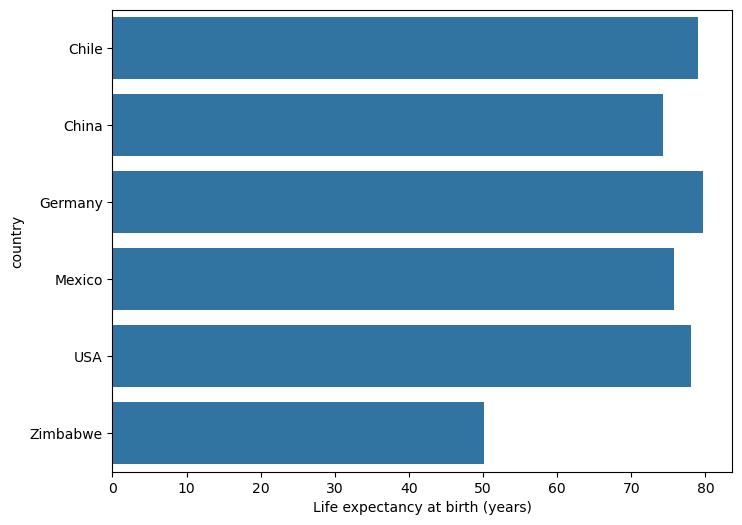

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x="life_exp", y="country", data=dfmeans)
plt.xlabel("Life expectancy at birth (years)")
plt.show()
plt.clf()

### Lineplot of GDP and Country

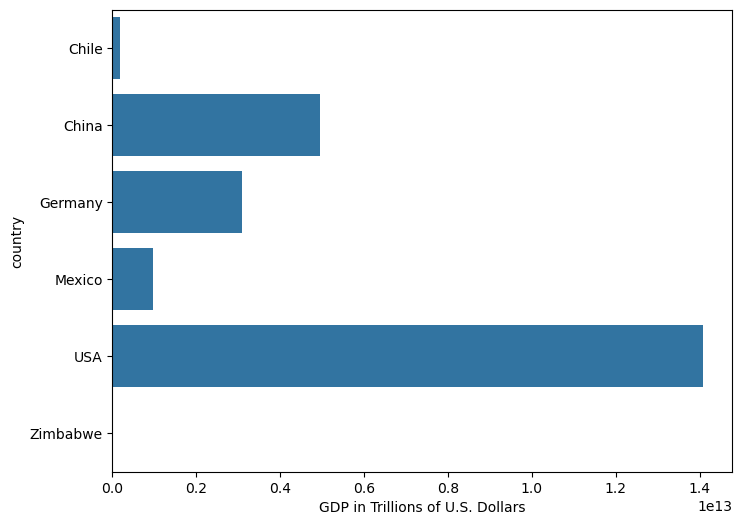

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x="gdp", y="country", data=dfmeans)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()
plt.clf()

In [15]:
print(data.head())

  country  year  life_exp           gdp
0   Chile  2000      77.3  7.786093e+10
1   Chile  2001      77.3  7.097992e+10
2   Chile  2002      77.8  6.973681e+10
3   Chile  2003      77.9  7.564346e+10
4   Chile  2004      78.0  9.921039e+10


### Scatter Plot of Life Expectancy and GPD

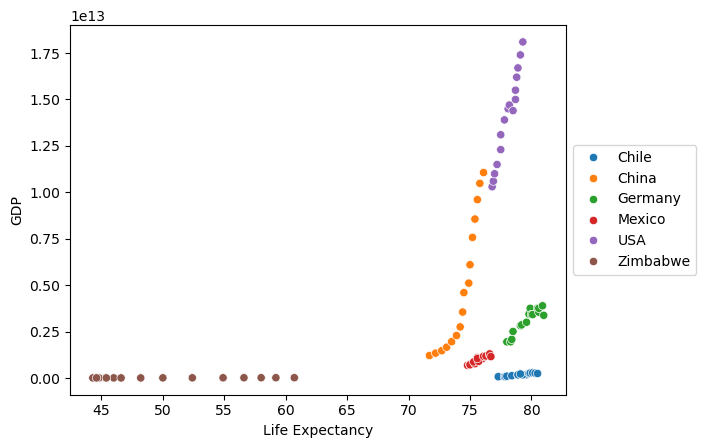

<Figure size 640x480 with 0 Axes>

In [16]:
sns.scatterplot(x=data.life_exp, y=data.gdp, hue=data.country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.show()
plt.clf()

### Scatter plot of countries, GPD and Life expectancy

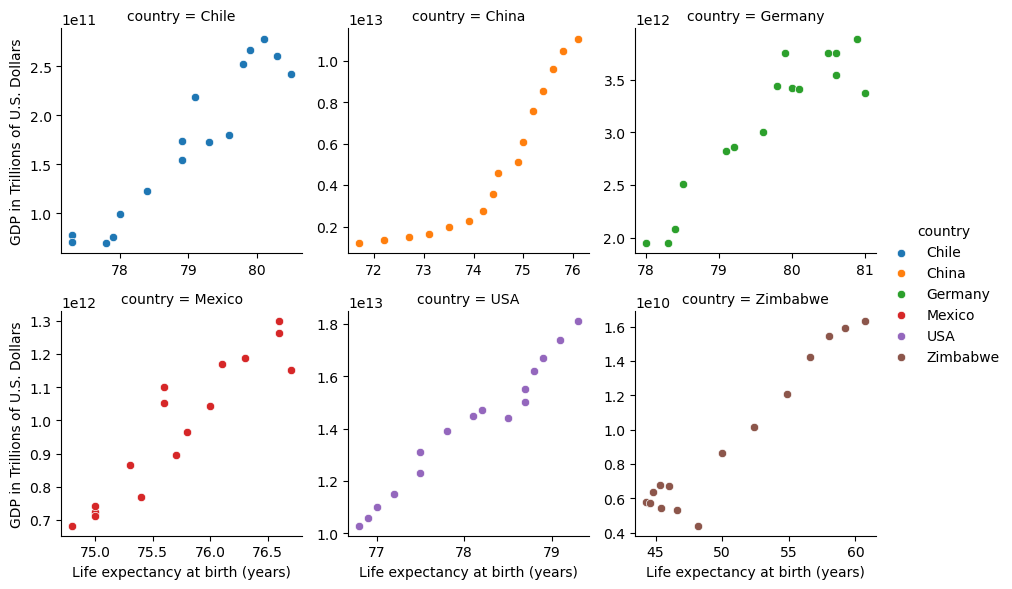

In [17]:
graph = sns.FacetGrid(data, col="country", col_wrap=3,
                      hue = "country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"life_exp", "gdp")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"))

### Conclusions

Anser to questions posed in the beginning.

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.